In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [6]:
%run "./../all_numerical_data.ipynb"

In [73]:
x_train.head()
y_train.head()  

0    Body Level 3
1    Body Level 3
2    Body Level 2
3    Body Level 3
4    Body Level 3
Name: Body_Level, dtype: object

In [74]:
base_estimator = DecisionTreeClassifier()

clf = AdaBoostClassifier(base_estimator=base_estimator)

param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train.values.ravel())

best_params = grid_search.best_params_


In [75]:
max_depth = best_params['base_estimator__max_depth']
n_estimators = best_params['n_estimators']
learning_rate = best_params['learning_rate']
print(f'Best max_depth: {max_depth}')
print(f'Best n_estimators: {n_estimators}')
print(f'Best learning_rate: {learning_rate}')

base_estimator = DecisionTreeClassifier(max_depth=max_depth)

clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print('Precision: ', precision_score(y_val, y_pred, average='macro'))
print('Recall: ', recall_score(y_val, y_pred, average='macro'))
print('F1-Score: ', f1_score(y_val, y_pred, average='macro'))


Best max_depth: 5
Best n_estimators: 200
Best learning_rate: 1.0
Accuracy: 0.9831081081081081
Precision:  0.9763853000287108
Recall:  0.970264355742297
F1-Score:  0.9730599749781335


In [76]:
# compute the macro f1 score using classification report
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

Body Level 1     1.0000    0.9412    0.9697        34
Body Level 2     0.9302    0.9524    0.9412        42
Body Level 3     0.9753    0.9875    0.9814        80
Body Level 4     1.0000    1.0000    1.0000       140

    accuracy                         0.9831       296
   macro avg     0.9764    0.9703    0.9731       296
weighted avg     0.9834    0.9831    0.9831       296



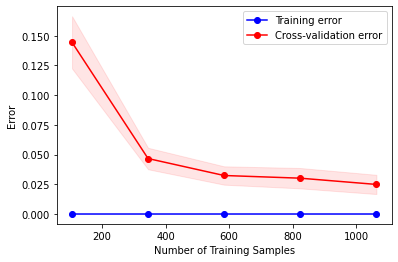

In [77]:
X = np.concatenate((x_train, x_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
train_sizes, train_scores, val_scores = learning_curve(clf, X, y, cv=5)
train_error = 1 - train_scores
val_error = 1 - val_scores

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# val_scores_mean = np.mean(val_scores, axis=1)
# val_scores_std = np.std(val_scores, axis=1)

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
#                  val_scores_mean + val_scores_std, alpha=0.1,
#                  color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
#          label="Training score")
# plt.plot(train_sizes, val_scores_mean, 'o-', color="r",
#          label="Cross-validation score")
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Accuracy Score')
# plt.legend(loc="best")
# plt.show()

train_error_mean = np.mean(train_error, axis=1)
train_error_std = np.std(train_error, axis=1)
val_error_mean = np.mean(val_error, axis=1)
val_error_std = np.std(val_error, axis=1)

plt.fill_between(train_sizes, train_error_mean - train_error_std,
                    train_error_mean + train_error_std, alpha=0.1,
                    color="b")
plt.fill_between(train_sizes, val_error_mean - val_error_std,
                    val_error_mean + val_error_std, alpha=0.1,
                    color="r")
plt.plot(train_sizes, train_error_mean, 'o-', color="b",
            label="Training error")
plt.plot(train_sizes, val_error_mean, 'o-', color="r",
            label="Cross-validation error")
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.legend(loc="best")
plt.show()


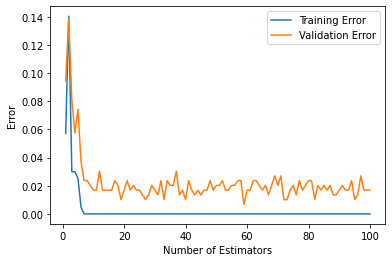

In [78]:

# Number of estimators to try
n_estimators = range(1, 101)

# Lists to store the training and validation errors
train_errors = []
val_errors = []

for n in n_estimators:
    # Create the AdaBoost classifier with a decision tree as the base classifier
    base_estimator = DecisionTreeClassifier(max_depth=max_depth)
    clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n, learning_rate=learning_rate)

    
    # Fit the classifier to the training data
    clf.fit(x_train, y_train)
    
    # Make predictions on the training and validation data
    train_pred = clf.predict(x_train)
    val_pred = clf.predict(x_val)
    
    # Calculate the training and validation errors
    train_error = 1 - accuracy_score(y_train, train_pred)
    val_error = 1 - accuracy_score(y_val, val_pred)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the training and validation errors against the number of estimators
plt.plot(n_estimators, train_errors, label="Training Error")
plt.plot(n_estimators, val_errors, label="Validation Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.legend()
plt.show()

In [79]:
# save the model as a pkl file
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [7]:
final_df = pd.concat([x_train, x_val], axis=0)
final_df_y = pd.concat([y_train, y_val], axis=0)

In [11]:
final_df_y.shape

(1329,)

In [10]:
max_depth= 5
n_estimators= 200
learning_rate= 1.0
base_estimator = DecisionTreeClassifier(max_depth=max_depth)

In [12]:
final_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
final_clf.fit(final_df, final_df_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200)

In [14]:
# save the model as a pkl file
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(final_clf, f)
    